In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('drive/My Drive/DataDays/second_round')

In [0]:
data = pd.read_csv('divar_posts_dataset.csv')

In [0]:
df=data

In [0]:
df['cat1_2'] = df.cat1.astype(str).str.cat(df.cat2.astype(str), sep='|')
df['cat1_2_3'] = df.cat1_2.astype(str).str.cat(df.cat3.astype(str), sep='|')

In [0]:
data=df

In [8]:
data.groupby('cat1_2_3').count()


,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year,cat1_2
cat1_2_3,,,,,,,,,,,,,,,,,,
businesses|batch|nan,11777,11777,0,11777,11777,0,11777,11777,11777,11777,11777,0,11777,11777,11777,0,0,11777
businesses|equipments-and-machinery|barbershop-and-beautysalon,3117,3117,0,3117,3117,3117,3117,3117,3117,3117,3117,0,3117,3117,3117,0,0,3117
businesses|equipments-and-machinery|cafe-and-restaurant,4670,4670,0,4670,4670,4670,4670,4670,4670,4670,4670,0,4670,4670,4670,0,0,4670
businesses|equipments-and-machinery|industrial,19985,19985,0,19985,19985,19985,19985,19985,19985,19985,19985,0,19985,19985,19985,0,0,19985
businesses|equipments-and-machinery|nan,521,521,0,521,521,0,521,521,521,521,521,0,521,521,521,0,0,521
businesses|equipments-and-machinery|offices,5148,5148,0,5148,5148,5148,5148,5148,5148,5148,5148,0,5148,5148,5148,0,0,5148
businesses|equipments-and-machinery|shop-and-cash,16660,16660,0,16660,16660,16660,16660,16660,16660,16660,16660,0,16660,16660,16660,0,0,16660
electronic-devices|audio-video|camera-camcoders,5147,5147,0,5147,5147,5147,5147,5147,5147,5147,5147,0,5147,5147,5147,0,0,5147
electronic-devices|audio-video|mp3-player,908,908,0,908,908,908,908,908,908,908,908,0,908,908,908,0,0,908


In [0]:
mylabel = data.cat1_2_3.unique()

In [0]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data)

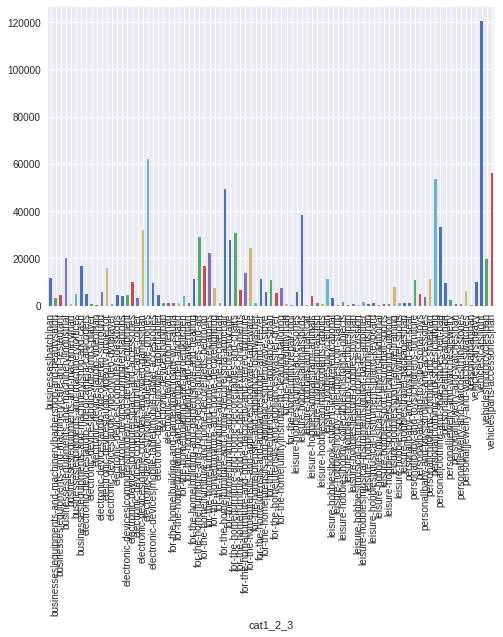

In [11]:
data.groupby('cat1_2_3').count().price.plot.bar()

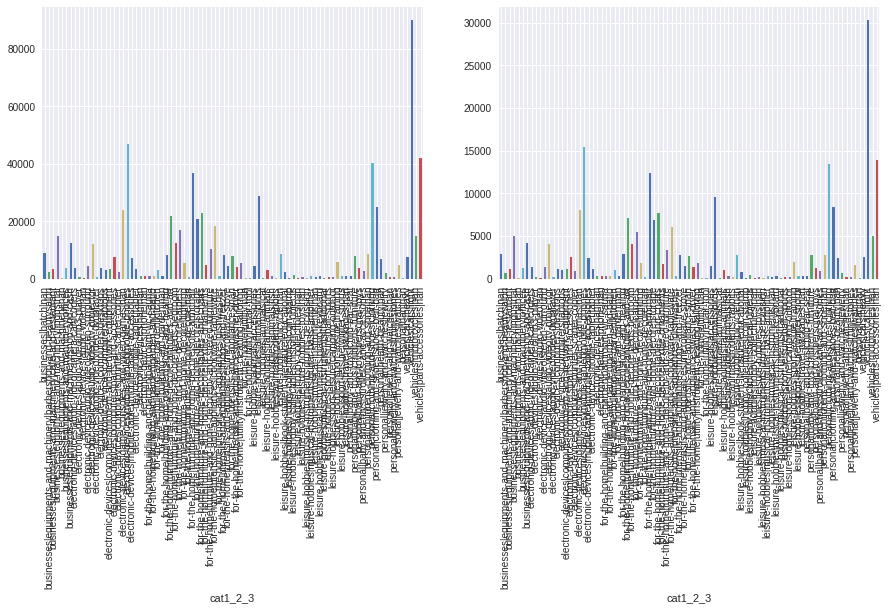

In [12]:
fig, axes = plt.subplots(1,2, figsize= (15,5))
train.groupby('cat1_2_3').count().price.plot.bar(ax = axes[0])
test.groupby('cat1_2_3').count().price.plot.bar(ax = axes[1])


In [0]:
labels = {j:i for i,j in enumerate(train.cat1_2_3.unique())}

In [0]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
content = list()
for i in train.cat1_2_3.unique():
    mystr = ''
    temp = train[train.cat1_2_3 == i]
    for j in temp.title:
        mystr+= j 
        mystr+= ' '
    for j in temp.desc:
        mystr+= j 
        mystr+= ' '
    content.append(mystr)

In [0]:
stop_wd=["و","در","به","از","که","این","را","با","است","برای","آن","یک","خود","تا","کرد","بر","هم","نیز","گفت","می‌شود","وی","شد","دارد","ما","اما","یا","شده","باید","هر","آنها","بود","او","دیگر","دو","مورد","می‌کند","شود","کند","وجود","بین","پیش","شده_است","پس","نظر","اگر","همه","یکی","حال","هستند","من","کنند","نیست","باشد","چه","می","بخش","می‌کنند","همین","افزود","هایی","دارند","راه","همچنین","روی","داد","بیشتر","بسیار","سه","داشت","چند","سوی","تنها","هیچ","میان","اینکه","شدن","بعد","جدید","ولی","حتی","کردن","برخی","کردند","می‌دهد","اول","نه","کرده_است","نسبت","بیش","شما","چنین","طور","افراد","تمام","درباره","بار","بسیاری","می‌تواند","کرده","چون","ندارد","دوم","بزرگ","طی","حدود","همان","بدون","البته","آنان","می‌گوید","دیگری","خواهد_شد","کنیم","قابل","یعنی","رشد","می‌توان","وارد","کل","ویژه","قبل","براساس","نیاز","گذاری","هنوز","لازم","سازی","بوده_است","چرا","می‌شوند","وقتی","گرفت","کم","جای","حالی","تغییر","پیدا","اکنون","تحت","باعث","مدت","فقط","زیادی","تعداد","آیا","بیان","رو","شدند","عدم","کرده_اند","بودن","نوع","بلکه","جاری","دهد","برابر","مهم","بوده","اخیر","مربوط","امر","زیر","گیری","شاید","خصوص","آقای","اثر","کننده","بودند","فکر","کنار","اولین","سوم","سایر","کنید","ضمن","مانند","باز","می‌گیرد","ممکن","حل","دارای","پی","مثل","می‌رسد","اجرا","دور","منظور","کسی","موجب","طول","امکان","آنچه","تعیین","گفته","شوند","جمع","خیلی","علاوه","گونه","تاکنون","رسید","ساله","گرفته","شده_اند","علت","چهار","داشته_باشد","خواهد_بود","طرف","تهیه","تبدیل","مناسب","زیرا","مشخص","می‌توانند","نزدیک","جریان","روند","بنابراین","می‌دهند","یافت","نخستین","بالا","پنج","ریزی","عالی","چیزی","نخست","بیشتری","ترتیب","شده_بود","خاص","خوبی","خوب","شروع","فرد","کامل","غیر","می‌رود","دهند","آخرین","دادن","جدی","بهترین","شامل","گیرد","بخشی","باشند","تمامی","بهتر","داده_است","حد","نبود","کسانی","می‌کرد","داریم","علیه","می‌باشد","دانست","ناشی","داشتند","دهه","می‌شد","ایشان","آنجا","گرفته_است","دچار","می‌آید","لحاظ","آنکه","داده","بعضی","هستیم","اند","برداری","نباید","می‌کنیم","نشست","سهم","همیشه","آمد","اش","وگو","می‌کنم","حداقل","طبق","جا","خواهد_کرد","نوعی","چگونه","رفت","هنگام","فوق","روش","ندارند","سعی","بندی","شمار","کلی","کافی","مواجه","همچنان","زیاد","سمت","کوچک","داشته_است","چیز","پشت","آورد","حالا","روبه","سال‌های","دادند","می‌کردند","عهده","نیمه","جایی","دیگران","سی","بروز","یکدیگر","آمده_است","جز","کنم","سپس","کنندگان","خودش","همواره","یافته","شان","صرف","نمی‌شود","رسیدن","چهارم","یابد","متر","ساز","داشته","کرده_بود","باره","نحوه","کردم","تو","شخصی","داشته_باشند","محسوب","پخش","کمی","متفاوت","سراسر","کاملا","داشتن","نظیر","آمده","گروهی","فردی","ع","همچون","خطر","خویش","کدام","دسته","سبب","عین","آوری","متاسفانه","بیرون","دار","ابتدا","شش","افرادی","می‌گویند","سالهای","درون","نیستند","یافته_است","پر","خاطرنشان","گاه","جمعی","اغلب","دوباره","می‌یابد","لذا","زاده","گردد","اینجا"]

In [0]:
tfidf  = TfidfVectorizer(stop_words=stop_wd)

In [0]:
tfidf.fit(content)

In [0]:
X_train = train.apply(lambda i : i.title + ' ' + i.desc, axis=1)
Y_train = train.apply(lambda i : labels[i.cat1_2_3], axis=1)

In [0]:
X_test = test.apply(lambda i : i.title + ' ' + i.desc, axis=1)
Y_test = test.apply(lambda i : labels[i.cat1_2_3], axis=1)

In [0]:
from sklearn.externals import joblib
tfidf = joblib.load('tfidf')

In [0]:
model.fit(tfidf.transform(X_train), Y_train)

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(Y_test, model.predict(tfidf.transform(X_test))))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آید', 'توان', 'تواند', 'توانند', 'رسد', 'رود', 'سال', 'نمی', 'های', 'گوید', 'گویند'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


NotFittedError: ignored

In [0]:
labels

In [0]:
from sklearn.externals import joblib
joblib.dump(model, './ada')


In [0]:
from sklearn.externals import joblib

tfidf = joblib.load('tfidf')
ada = joblib.load('ada')

In [0]:
print(classification_report(Y_test, ada.predict(tfidf.transform(X_test))))

NameError: ignored

In [0]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

In [0]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [0]:
def label_sentences(corpus, label_type):

    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [0]:
all_data

In [0]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
model_dbow.min_alpha = model_dbow.alpha

In [0]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, Y_train)
#logreg = logreg.fit(train_vectors_dbow, y_train)
Y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred,target_names=my_tags))